# Soal Latihan Probabilitas dan Statistika

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Mudah

1. Sebuah program memiliki kemungkinan menyebabkan komputer crash sebesar 0.2. Program tersebut dijalankan di 50 komputer. Berapa peluangnya semua komputer dapat bekerja dengan baik?

Jawaban paling sederhana
\begin{align}
p(crash) &= 0.2 \\
p(not~crash) &= 1 - 0.2 = 0.8 \\
p(all~not~crash) &= 0.8^{50}
\end{align}

Alternatif: Mengikuti Binomial distribution dengan $n=50$, $\theta=0.2$.
$$
X \sim Bin(50, 0.2)
$$
$$
p(X=0) = \binom{50}{0} 0.2^{0} (1-0.2)^{50-0}
$$

In [35]:
binom(n=50, p=.2).pmf(0)

1.4272476927059582e-05

2. Sebuah cuitan di Twitter ditunjukkan ke 100 orang berbeda. Asumsikan bahwa peluang cuitan tersebut akan di-RT oleh sembarang orang adalah 0.7. Berapa ekspektasi jumlah RT yang didapat?

Dengan asumsi distribusi Binomial,

$$
X \sim Bin(100, 0.7)
$$

$$
\mathbb{E}[X] = np = 100 \times 0.7 = 70
$$

Alternatif

In [91]:
n_trials = 10000
x = []
for _ in range(n_trials):
    x.append(
        (np.random.rand(100) <= .7).sum()
    )
np.mean(x)

70.0778

3. Dalam setahun, rata-rata ada 2.8 gempa bumi berskala besar yang terjadi di dunia. Berapa peluangnya ada > 1 gempa bumi berskala besar di tahun depan?

Asumsi
$$
X \sim Poi(2.8)
$$

\begin{align}
P(X>1) &= 1 - P(X \leq 1) \\
&= 1-[P(X=0) + P(X=1)]
\end{align}

In [7]:
1-poisson(2.8).cdf(1)

0.7689217620241717

Poisson bisa dihampiri dengan distribusi normal, tapi tidak kali ini.

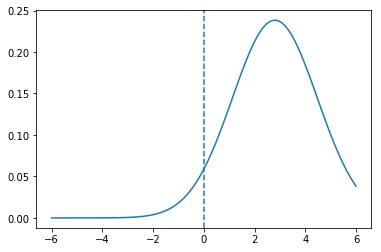

In [116]:
x = np.linspace(-6,6,100)
plt.plot(x, norm(2.8,np.sqrt(2.8)).pdf(x))
plt.axvline(0, linestyle='--');

4. Seorang pengemudi ojek online mendapatkan rata-rata 90 penumpang per minggu di suatu kota. Berapa peluangnya di minggu ini dia akan mendapatkan minimal 80 penumpang?

$$
X \sim Poi(90)
$$

Alternatif
$$
X \sim \mathcal{N}(90, 90)
$$

Ditanya:
$$
P(X \geq 80) = 1 - \sum_{i=0}^{79} P(X=i) = 1 - P(X \leq 79)
$$

In [120]:
1-poisson(90).cdf(79)

0.8668195027664695

Di sini aproksimasi dengan distribusi normal bisa cukup dekat hasilnya.

In [121]:
1-norm(90, np.sqrt(90)).cdf(79)

0.8768741501537365

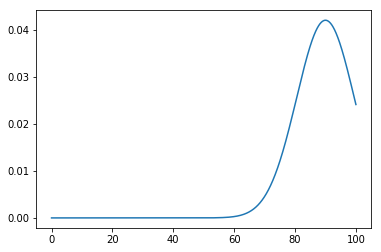

In [226]:
x = np.linspace(0,100,1000)
lamb = 90
plt.plot(x, norm(lamb, np.sqrt(lamb)).pdf(x));

5. Suatu konferensi machine learning top dunia punya rata-rata acceptance rate 25%. Jika di tahun ini mereka mendapatkan 2400 paper untuk diulas, berapa peluangnya jumlah paper yang diterima di tahun ini tidak sampai 500?

$$
X \sim Bin(2400, .25)
$$

$$
P(X < 500) = 
$$

In [128]:
binom(n=2400,p=.25).cdf(499)

6.821028653817123e-07

6. Rata-rata occupancy dari sebuah hotel di kota X pada hari Sabtu adalah 85%. Jika hotel tersebut memiliki 20 kamar, berapa peluangnya hotel tersebut akan terisi penuh di hari Sabtu yang akan datang?

$$
X \sim Bin(20, .85)
$$

$$
P(X=20) =
$$

In [104]:
binom(n=20, p=.85).pmf(20)

0.03875953108451434

Poisson tidak bisa digunakan dalam kasus ini karena memungkinkan nilai $X > 20$.

In [129]:
poisson(20*.85).pmf(20)

0.06915882695522822

7. Ketika melempar koin, mana yang lebih mungkin: 51 atau lebih muncul “angka” dari 100 lemparan atau 510 atau lebih muncul “angka” dari 1000 lemparan?

Asumsikan fair coin

$$
X \sim Bin(100, .5)
$$
$$
Y \sim Bin(1000, .5)
$$

$$
P(X \geq 51) ... P(Y \geq 510)
$$

In [105]:
1-binom(100, .5).cdf(50)

0.4602053813064103

In [106]:
1-binom(1000, .5).cdf(510)

0.25333002131247495

## Sedang

1. Di suatu pusat data dengan 100 server, tiap request dialokasikan ke tiap server secara acak dengan peluang yang sama. Berdasarkan catatan, setiap server akan mendapatkan rata-rata 2 requests per detik. Perusahaan yang menggunakan pusat data tersebut baru saja merilis kode ke semua server yang menyebabkan server akan crash jika mendapatkan lebih dari 6 requests per detik. Berapa peluangnya bahwa tidak ada server yang akan crash di detik berikutnya?

$$
X_i \sim Poi(2)
$$

Ditanya:
$$
P(X_1 \leq 6, X_2 \leq 6, ..., X_{100} \leq 6)
$$

Jawab:
$$
P(X_1 \leq 6, X_2 \leq 6, ..., X_{100} \leq 6) = \prod_{i=1}^{100} P(X_i \leq 6)
$$

In [133]:
poisson(2).cdf(6)

0.9954661944737512

In [131]:
poisson(2).cdf(6)**100

0.634821488981177

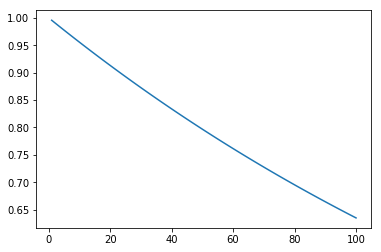

In [132]:
p = []
for i in range(1,101):
    p.append(poisson(2).cdf(6)**i)
plt.plot(range(1,101), p);

## Sukar

4. Seorang penikmat musik sedang shuffle play lagu soundtrack Charlie's Angels terbaru. Di albumnya ada 11 lagu, 6 di antaranya lagu Ariana Grande. Berapa peluangnya didapatkan lagu Ariana Grande tiga kali berturut-turut? (Sumber: Twitter)

In [166]:
from scipy.special import factorial

In [216]:
factorial(11)

array(39916800.)

In [223]:
from itertools import permutations
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def check_triplets(songs):
    return ''.join(songs).find('aaa') != -1

def permute(songs):
    counter = 0
    n = 0
    for song_seq in tqdm(permutations(songs)):
        counter += check_triplets(song_seq)
        n += 1
    return counter/n

def sample(songs, n):
    counter = 0
    for _ in range(n):
        np.random.shuffle(songs)
        counter += check_triplets(songs)
    return counter/n

def main():
    songs = [c for c in 'aaaaaaxxxxx']

    probs = []
    for _ in range(1000):
        probs.append(sample(songs, 1000))
    sns.distplot(probs, fit=norm, kde=False)
    plt.xlabel('p(x)')
    plt.ylabel('f(p(x))')
    plt.title('$p(x) = %.4f \\pm %.4f$' % (np.mean(probs), np.std(probs)))
    plt.show()

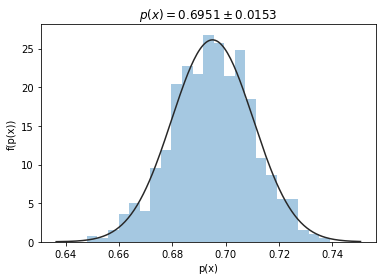

In [225]:
main()

In [165]:
permute(songs)

39916800it [00:41, 966430.16it/s] 


0.6948051948051948